In [61]:
import numpy as np

In [62]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [63]:
p = Path("./Dataset/")
dirs = p.glob("*")

image_data =[]
labels = []
labels_dic = {"Pikachu":0, "Bulbasaur":1, "Meowth":2}
label2poke = {0:"Pikachu", 1:"Bulbasaur", 2:"Meowth"}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    count = 0
    print(label)
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dic[label])
        count += 1
    print(count)

Bulbasaur
176
Meowth
70
Pikachu
199


In [64]:
X = np.array(image_data)
Y = np.array(labels)

#shuffle our data
from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state=2)

X = X/255.0

print(Y)

[0 2 0 0 2 1 0 0 1 2 0 2 1 0 0 1 1 0 0 2 1 1 2 2 2 0 0 0 1 0 2 0 1 1 1 0 1
 2 0 0 0 0 2 0 1 0 0 2 0 1 1 0 0 2 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 2 1 0 0 1 1 0 1 1 2 0 0 0 0 0 1 0 2 1 1 1 0 1 2 0 2 2 1 2 0 1 0 1
 1 2 1 1 0 0 2 1 0 1 0 1 1 2 0 1 2 1 2 0 2 0 0 1 0 0 0 1 1 0 0 2 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 2 1 2 0 1 2 1 2 0 0 1 2 2 1 1 0 0 2 1 1 0 0 1 1
 1 0 0 0 2 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 2 1 0 0 2 1 2 2 1 1 0 2 0 0 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1
 0 0 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 2 1 1 1 0
 0 2 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0
 0 2 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 0 1 0 0 1 0 1 1 1
 1]


In [65]:
print(X.shape)
print(Y.shape)

(445, 40, 40, 3)
(445,)


In [66]:
# Draw sample pokemons

In [67]:
def draw(image, label):
    plt.style.use('seaborn')
    plt.title(label2poke[label])
    plt.imshow(image)
    plt.axis("off")
    plt.show()

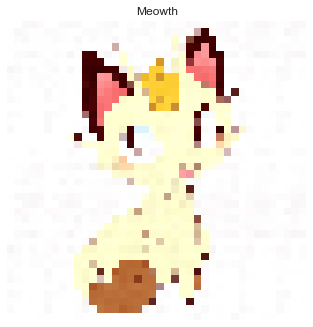

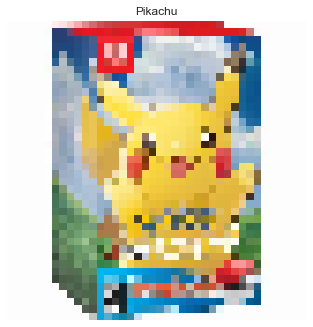

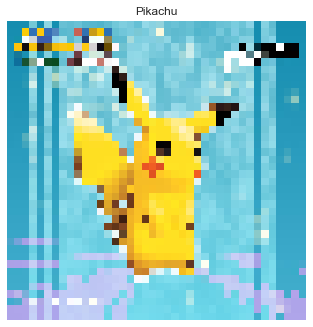

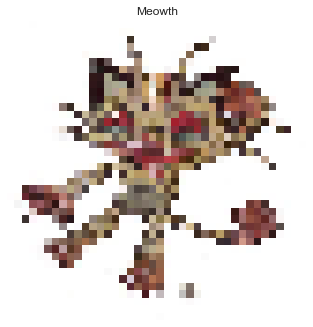

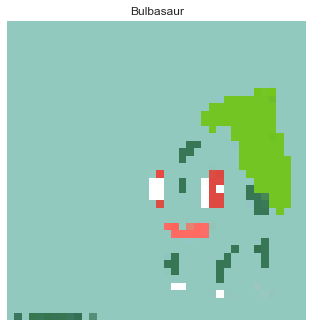

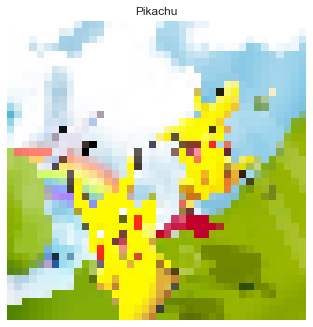

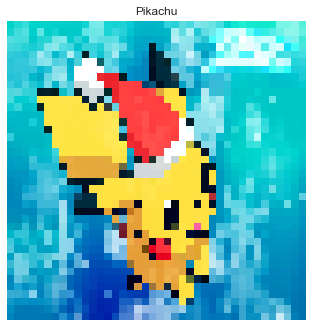

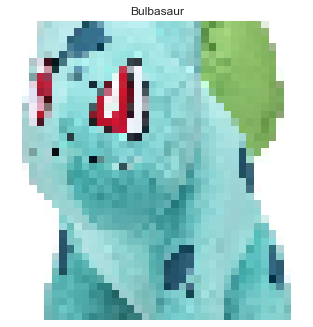

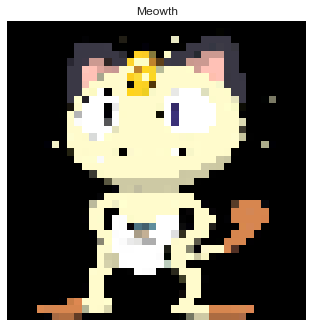

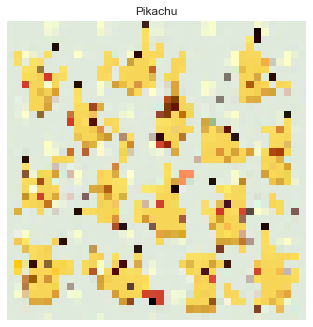

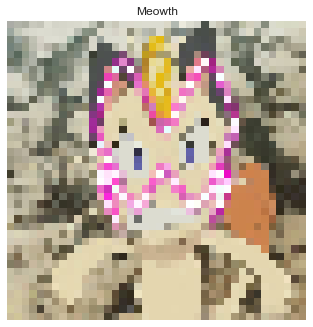

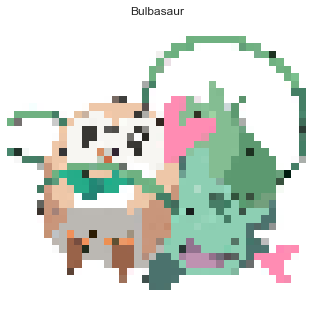

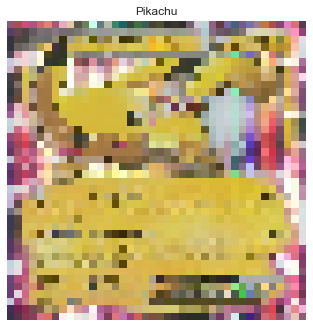

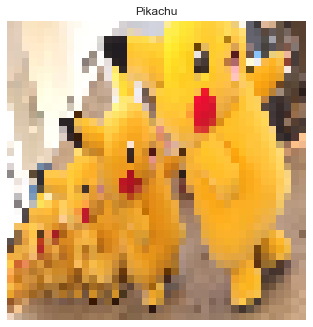

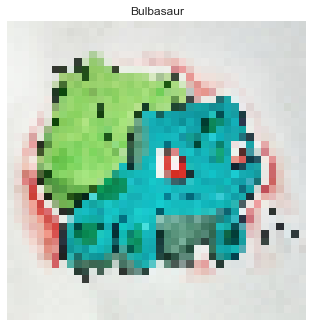

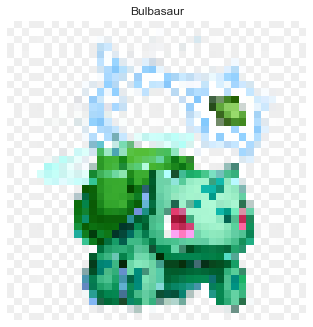

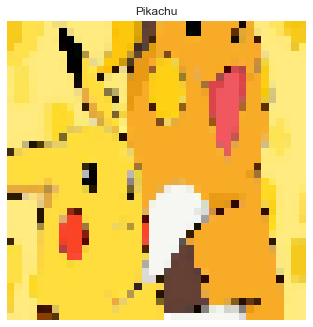

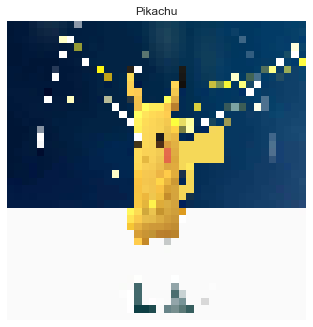

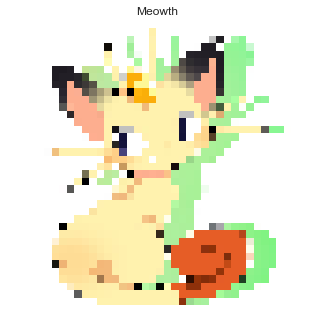

In [68]:
for i in range(1,20):
    draw(X[i], Y[i])

In [69]:
#Training and testing data
split = int(X.shape[0]*0.8)

X_ = np.array(X)
Y_ = np.array(Y)

#Training set
X = X_[:split,:]
Y = Y_[:split]

#Test set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape, Y.shape)
print(XTest.shape, YTest.shape)

(356, 40, 40, 3) (356,)
(89, 40, 40, 3) (89,)


In [70]:
# Make Model Neural Network

In [71]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa, axis=1, keepdims=True)
    return ans

In [72]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)

        model = {}

        #first layer
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))

        #second layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))

        #output layer
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))


        self.model = model

    def forward(self, x):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']

        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        
        return y_
        
    def backward(self, x, y, learning_rate = 0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]
        
        a1, a2, y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, W2.T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis=0)/float(m)
        
        #gradint descent
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ = self.activation_outputs
        
        print("W1 ", W1.shape)
        print("a1 ", a1.shape)
        
        print("W2 ", W2.shape)
        print("a2 ", a2.shape)
        
        print("W3 ", W3.shape)
        print("Y_ ", y_.shape)

In [73]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [84]:
def train(X, Y, model, epochs, learning_rate, logs = True):
    training_loss = []
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y, classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        
        model.backward(X, Y_OHT, learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d loss %.4f"%(ix, l))
            
    return training_loss

In [85]:
model = NeuralNetwork(input_size = 4800, layers = [100, 50], output_size = 3)

In [86]:
print(X.shape)

(356, 4800)


In [87]:
X = X.reshape(X.shape[0], -1)
print(X.shape)

(356, 4800)


In [88]:
XTest = XTest.reshape(XTest.shape[0], -1)
print(XTest.shape)

(89, 4800)


In [89]:
l = train(X, Y, model,500, 0.0002)

Epoch 0 loss 3.1889
Epoch 50 loss 0.2728
Epoch 100 loss 0.1356
Epoch 150 loss 0.1027
Epoch 200 loss 0.0836
Epoch 250 loss 0.0701
Epoch 300 loss 0.0578
Epoch 350 loss 0.0497
Epoch 400 loss 0.0451
Epoch 450 loss 0.0405


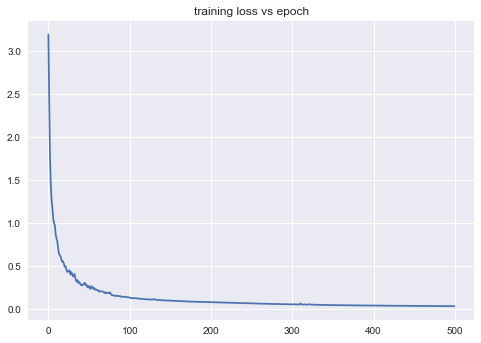

In [90]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.title("training loss vs epoch")
plt.plot(l)
plt.show()

In [91]:
def getAccuracy(X, Y, model):
    outputs = model.predict(X)
    acc = np.sum((outputs == Y)/Y.shape[0])
    return acc

print("Training accuracy is %.4f"%getAccuracy(X,Y,model))
print("Testing accuracy is %.4f"%getAccuracy(XTest, YTest, model))

Training accuracy is 0.9775
Testing accuracy is 0.6517
